In [5]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
file_ids = np.loadtxt('../data/all_files.txt', dtype=str)[:,1]

In [8]:
data_path = '/home/youssef/Desktop/data/brain-cancer/'
file_pathes = [data_path + file for file in file_ids]

In [54]:
# Loading sampling patterns. Notice that here we are using uncentred k-space
var_sampling_mask = np.fft.fftshift(~np.load("../data/sampling_masks/R10_512x512_poisson_center_true_radius_40_r_2.66.npy"),axes=(1,2))

In [83]:
for file in file_pathes:
    rec = nib.load(file).get_fdata()
    rec = np.swapaxes(rec,0,2)
    kspace = np.fft.fft2(rec)
    indexes = np.random.choice(np.arange(var_sampling_mask.shape[0],dtype =int),kspace.shape[0],replace = True)
    var_sampling_mask = (var_sampling_mask[indexes])
    kspace[var_sampling_mask] = 0
    rec_back = np.fft.ifft2(kspace)
    rec_back = rec_back 
    

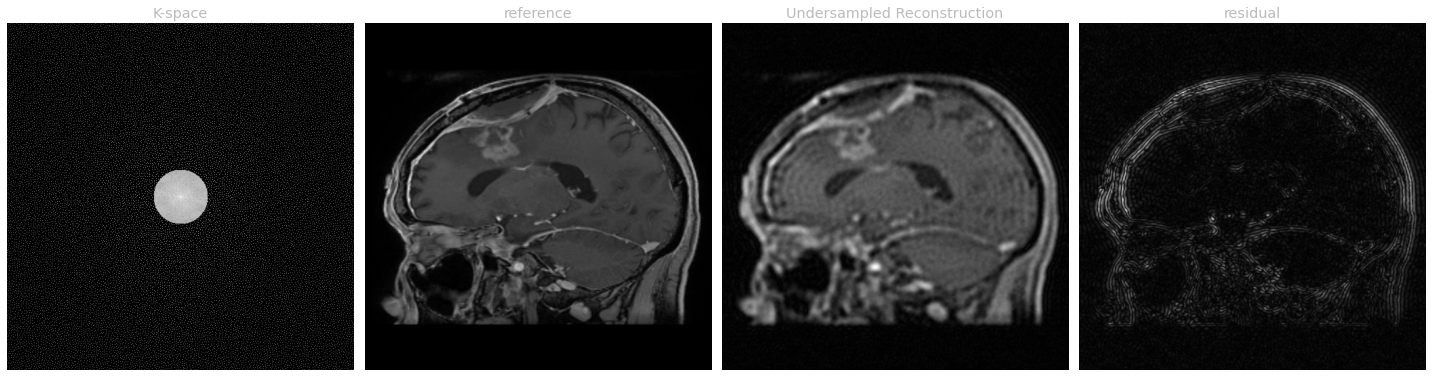

In [84]:
fig = plt.figure(figsize=(20,10))
plt.subplot(141)
plt.title('K-space')
plt.axis('off')
plt.imshow(np.log(np.abs(1+np.fft.fftshift(kspace[100]))), cmap='gray')
plt.subplot(142)
plt.title('reference')
plt.axis('off')
plt.imshow(rec[100], cmap='gray')
plt.subplot(143)
plt.title('Undersampled Reconstruction')
plt.axis('off')
plt.imshow(np.abs(rec_back[100]), cmap='gray')
plt.subplot(144)
plt.title('residual')
plt.axis('off')
plt.imshow(np.abs(rec_back[100]-rec[100]), cmap='gray')
plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()

In [25]:
# Loading sampling patterns. Notice that here we are using uncentred k-space
var_sampling_mask = np.fft.fftshift(~np.load("../data/sampling_masks/R10_512x512_poisson_center_true_radius_40_r_2.66.npy"),axes=(1,2))
var_sampling_mask = np.concatenate((var_sampling_mask[:,:,:,np.newaxis],var_sampling_mask[:,:,:,np.newaxis]),\
                               
                                   axis = -1)

In [36]:
rec = nib.load(file_pathes[0]).get_fdata()
rec = np.swapaxes(rec,0,2) / np.abs(rec).max()
f = np.fft.fft2(rec)
kspace = np.zeros((*rec.shape,2))
kspace[:,:,:,0] = f.real
kspace[:,:,:,1] = f.imag

In [37]:
indexes = np.random.choice(np.arange(var_sampling_mask.shape[0],dtype =int),kspace.shape[0],replace = True)
val_var_sampling_mask = (var_sampling_mask[indexes])

In [38]:
print(val_var_sampling_mask.shape)

(147, 512, 512, 2)


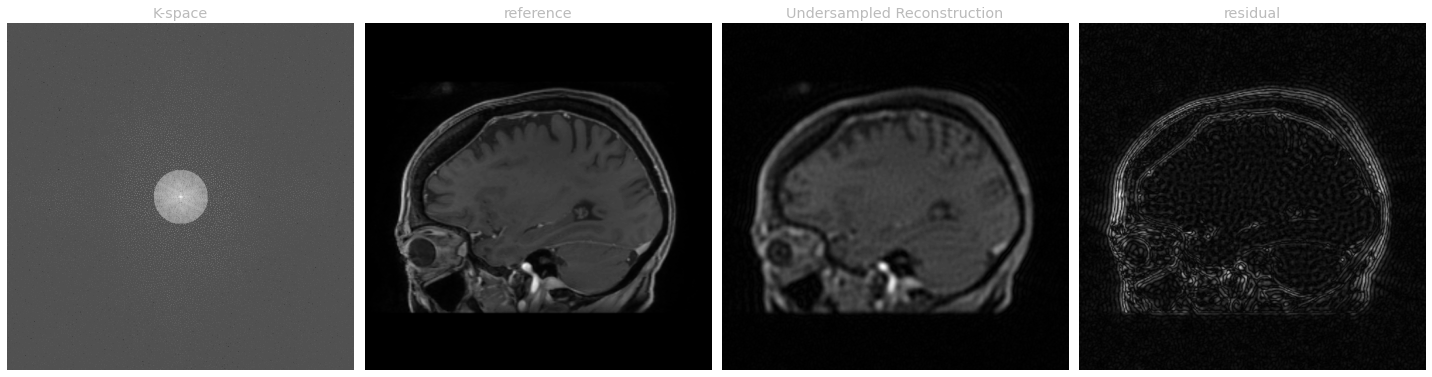

In [40]:
kspace[val_var_sampling_mask] = 0

rec_back = np.fft.ifft2(kspace[...,0]+1j*kspace[...,1])
rec_back = rec_back / np.abs(rec_back).max()
fig = plt.figure(figsize=(20,10))
plt.subplot(141)
plt.title('K-space')
plt.axis('off')
plt.imshow(np.log(np.abs(1+np.fft.fftshift(kspace[100,:,:,0]+1j*kspace[100,:,:,1]))), cmap='gray')
plt.subplot(142)
plt.title('reference')
plt.axis('off')
plt.imshow(rec[100], cmap='gray')
plt.subplot(143)
plt.title('Undersampled Reconstruction')
plt.axis('off')
plt.imshow(np.abs(rec_back[100]), cmap='gray')
plt.subplot(144)
plt.title('residual')
plt.axis('off')
plt.imshow(np.abs(rec_back[100]-rec[100]), cmap='gray')
plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()

In [24]:
kspace = []
for file in file_pathes[:2]:
    aux = np.swapaxes(nib.load(file).get_fdata(), 0,2)
    f = np.fft.fft2(aux)
    aux2 = np.zeros((*aux.shape,2))
    aux2[:,:,:,0] = f.real
    aux2[:,:,:,1] = f.imag
    kspace.append(aux2)
kspace = np.concatenate(kspace)

(-0.5, 511.5, 511.5, -0.5)

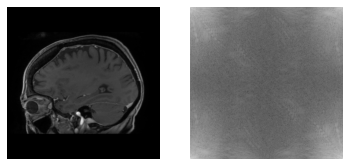

In [25]:

plt.figure()
plt.subplot(121)
plt.imshow(aux[100,:,:],cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(np.log(1+np.abs(aux2[100,:,:,0] + 1j*aux2[100,:,:,1])), cmap='gray')
plt.axis('off')

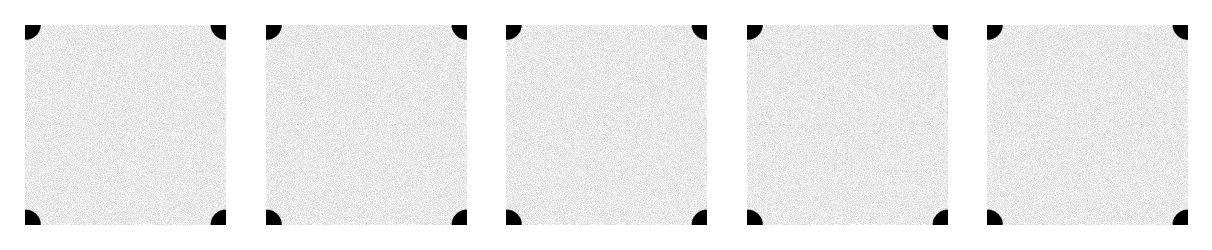

Undersampling: 0.8993552780151367


In [26]:
# Loading sampling patterns. Notice that here we are using uncentred k-space
var_sampling_mask = np.fft.fftshift(~np.load("../data/sampling_masks/R10_512x512_poisson_center_true_radius_40_r_2.66.npy"),axes=(1,2))
var_sampling_mask = np.concatenate((var_sampling_mask[:,:,:,np.newaxis],var_sampling_mask[:,:,:,np.newaxis]),\
                               
                                   axis = -1)

# White pixels are retrospectively discarded
plt.figure(dpi = 250)
for ii in range(5):
    plt.subplot(1,5,ii+1)
    plt.imshow(var_sampling_mask[ii*10,:,:,0],cmap = "gray")
    plt.axis("off")
plt.show()

print("Undersampling:", 1.0*var_sampling_mask.sum()/var_sampling_mask.size)

In [27]:
print(var_sampling_mask.shape)

(100, 512, 512, 2)


In [28]:
# Undersampling the validation set
indexes = np.random.choice(np.arange(var_sampling_mask.shape[0],dtype =int),kspace.shape[0],replace = True)
var_sampling_mask = (var_sampling_mask[indexes])
kspace[var_sampling_mask] = 0

In [29]:
aux.shape

(147, 512, 512)

(-0.5, 511.5, 511.5, -0.5)

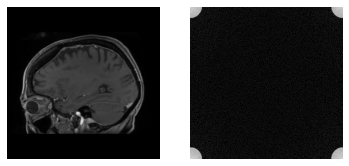

In [30]:

plt.figure()
plt.subplot(121)
plt.imshow(aux[100,:,:],cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(np.log(1+np.abs(kspace[100,:,:,0] + 1j*kspace[100,:,:,1])), cmap='gray')
plt.axis('off')

In [31]:
fback = np.fft.ifft2(np.abkspace)
aux_rec = np.zeros(kspace.shape)
aux_rec[:,:,:,0] = fback.real
aux_rec[:,:,:,1] = fback.imag





ValueError: could not broadcast input array from shape (294,512,512,2) into shape (294,512,512)

In [33]:
fback.real.shape

(294, 512, 512, 2)

In [14]:
rec = np.abs(aux_rec[100,:,:,0]+1j*aux_rec[100,:,:,1])

array([[[2172.70665209, 3507.65708516],
        [3367.03996361, 2666.11245552],
        [4646.92274633, 2040.0604161 ],
        ...,
        [4948.91416403, 5615.84027359],
        [4646.92274633, 2040.0604161 ],
        [3367.03996361, 2666.11245552]],

       [[ 168.66623079, 5794.09750368],
        [3845.07562186, 4574.87954882],
        [4001.38483117, 1567.5918344 ],
        ...,
        [2684.66733358, 2393.6005883 ],
        [4001.38483117, 1567.5918344 ],
        [3845.07562186, 4574.87954882]],

       [[4415.93510838, 4160.5752924 ],
        [3318.52845407, 3587.00381259],
        [1706.58381069, 1653.95880522],
        ...,
        [2633.56707614, 1825.13452095],
        [1706.58381069, 1653.95880522],
        [3318.52845407, 3587.00381259]],

       ...,

       [[5507.39181263,  957.45043321],
        [5397.00558975, 2407.77083787],
        [5726.87398892, 4702.15282982],
        ...,
        [7205.7113081 , 4800.77601666],
        [5726.87398892, 4702.15282982],
        [

TypeError: Invalid shape (512, 512, 2) for image data

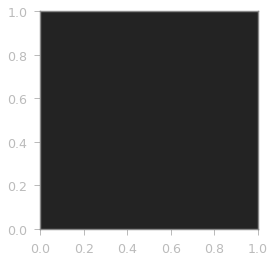

In [13]:
plt.figure()
plt.imshow()